This file is associated with Lecture 13

# Loading the Data and Packages

In [1]:
# Let's load some packages we need
import mne
import mne.viz
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.channels import make_standard_montage
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import copy
#Load Dataset
subject = 1 # use data from subject 1
runs = [6, 10, 14] # use only hand and feet motor imagery runs
#Get data and locate in to given path
files = eegbci.load_data(subject, runs, '../datasets/')
#Read raw data files where each file contains a run
raws = [read_raw_edf(f, preload=True) for f in files]
#Combine all loaded runs
raw_obj = concatenate_raws(raws)
raw_data = raw_obj._data
#Set Standard Channel Locations
eegbci.standardize(raw_obj) # set channel names
montage = make_standard_montage('standard_1005')
raw_obj.set_montage(montage)
#Extract events from raw data
events, event_ids = mne.events_from_annotations(raw_obj, event_id='auto')
tmin, tmax = -1, 4 # define epochs around events (in s)
#event_ids = dict(hands=2, feet=3) # map event IDs to tasks
epochs = mne.Epochs(raw_obj, events, event_ids, tmin - 0.5, tmax + 0.5, baseline=None, preload=True)
# Get sammpling frequency
fs=raw_obj.info['sfreq']

Extracting EDF parameters from e:\Other\Schoo\NeuralDataScience\Neural-Data-Science\datasets\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from e:\Other\Schoo\NeuralDataScience\Neural-Data-Science\datasets\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from e:\Other\Schoo\NeuralDataScience\Neural-Data-Science\datasets\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
90 matching events found
No baseline correction applied
0 proj

# Power Spectral Density (PSD)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


c:\Users\Wise\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


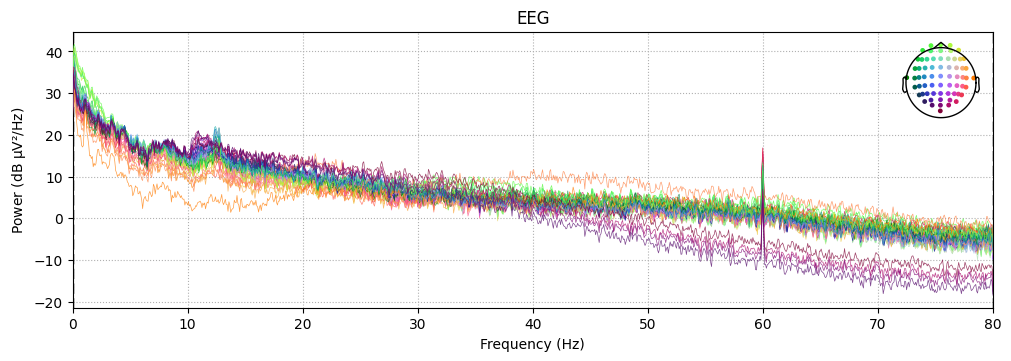

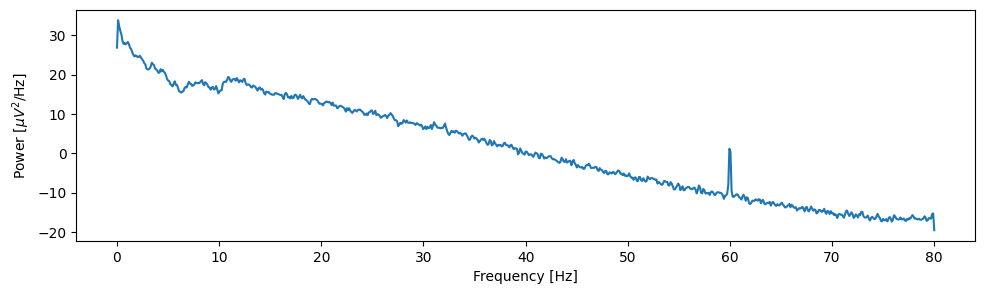

In [2]:
# In order to plot the PSD we could use the mne plot_psd function
raw_obj.plot_psd()
# Alternativly, you could use the Scipy
f, Sxx = sp.signal.welch(raw_obj._data[60,:], fs=fs, window=('hann'),
nperseg=1500, noverlap=1000, scaling='density')
# The scale of Sxx when we use scaling='density' is V**2/Hz
# To change the scale to muV**2/Hz(Db) which mne uses we use the
# following conversion
plt.figure(figsize=(11.6,3))
plt.plot(f, 10*np.log10(Sxx*1e6**2))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()

# PSD for all channels

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


c:\Users\Wise\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


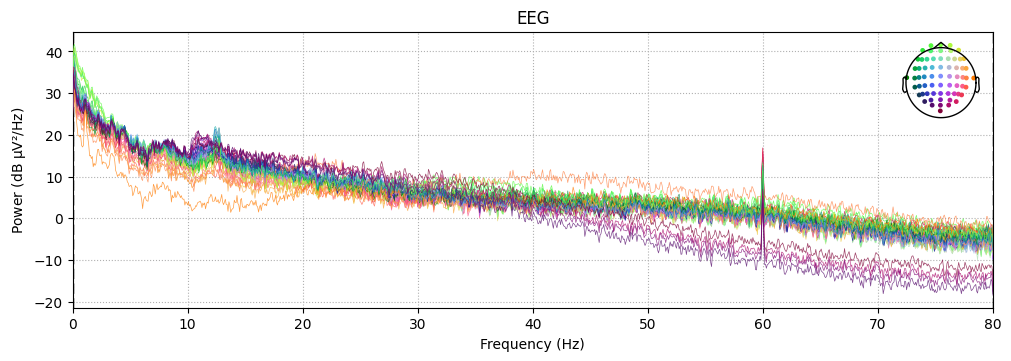

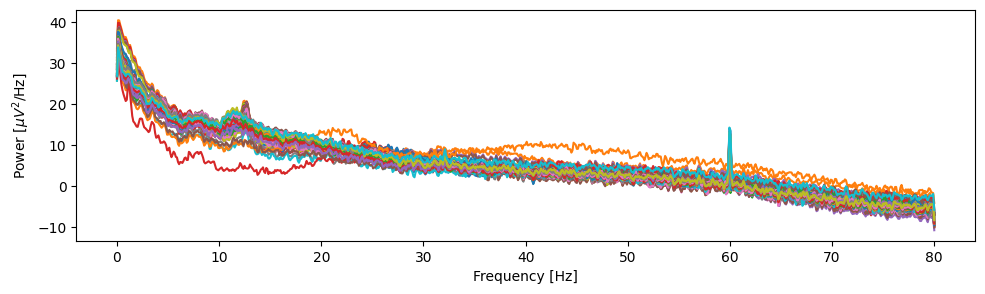

In [3]:
# In order to plot the PSD we could use the mne plot_psd function
raw_obj.plot_psd()
plt.figure(figsize=(11.6,3))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [$\mu V^2$/Hz]')
# Alternativly, you could use the Scipy
for i in range(60):
    f, Sxx = sp.signal.welch(raw_obj._data[i,:], fs=fs, window=('hann'),
    nperseg=1500, noverlap=1000, scaling='density')
    # The scale of Sxx when we use scaling='density' is V**2/Hz
    # To change the scale to muV**2/Hz(Db) which mne uses we use the
    # following conversion
    plt.plot(f, 10*np.log10(Sxx*1e6**2))
plt.show()

# Frequency Bands

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


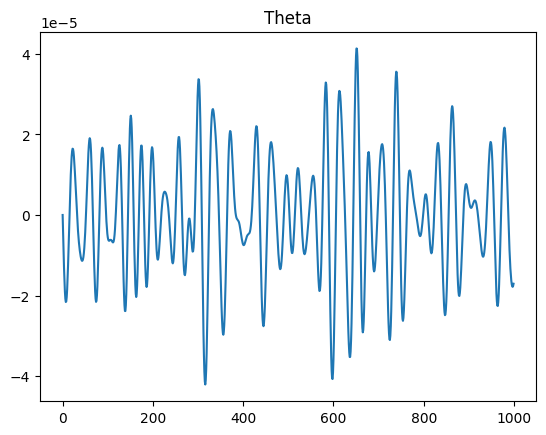

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


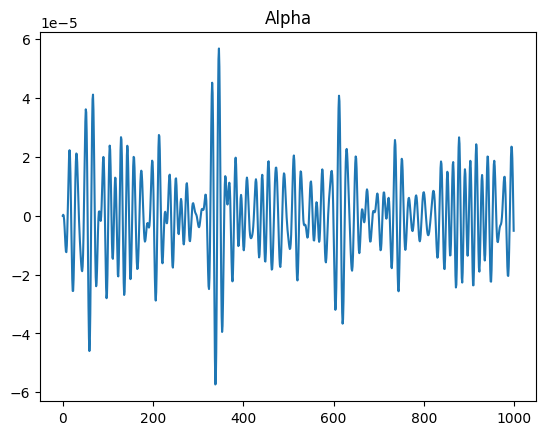

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 13 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 15.50 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


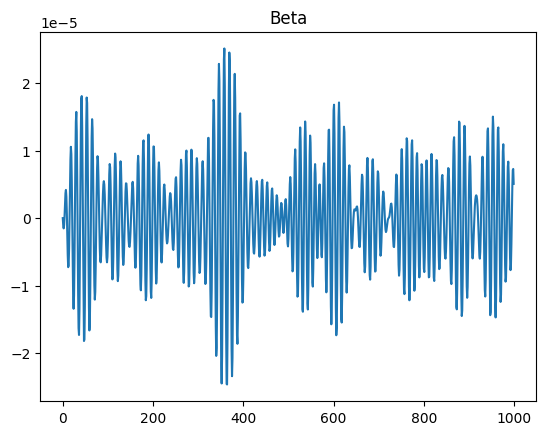

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 30 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 29.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 45.50 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


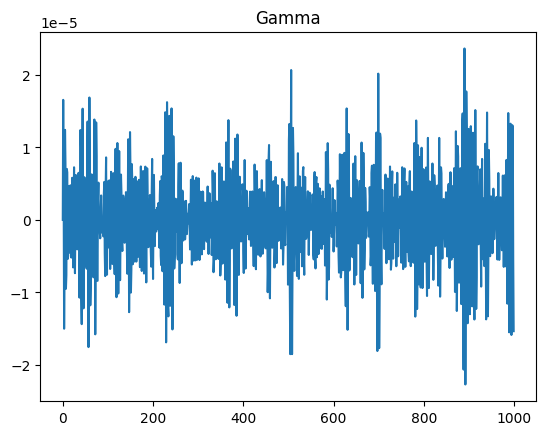

In [4]:
# Let us explore some frequency bands
iter_freqs = [
('Theta', 4, 7),
('Alpha', 8, 13),
('Beta', 13, 15),
('Gamma', 30, 45)
]
band_obj=[]
c=0
for band, fmin, fmax in iter_freqs:
    # bandpass filter
    band_obj.append(raw_obj.copy().filter(fmin, fmax,l_trans_bandwidth=1,h_trans_bandwidth=1))
    # make sure filter params are the same
    plt.plot(band_obj[c]._data[10,0:1000])
    plt.title(band)
    plt.show()
    c=c+1

# Make all bands in one plot

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 529 samples (3.306 s)

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 13 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Upper passband edg

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 30 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 29.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 45.50 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


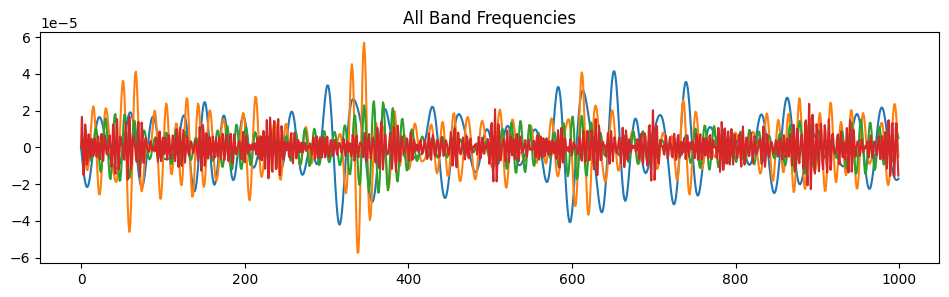

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 8.00 Hz)
- Filter length: 265 samples (1.656 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Theta


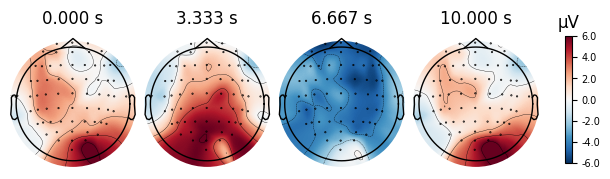

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 265 samples (1.656 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Alpha


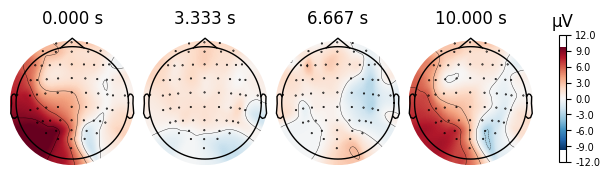

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 13 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 163 samples (1.019 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Beta


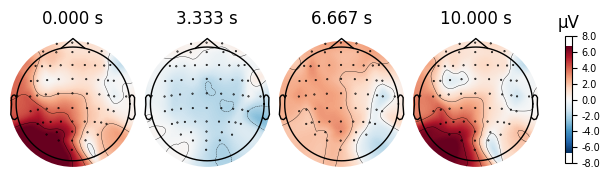

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 30 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 71 samples (0.444 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Gamma


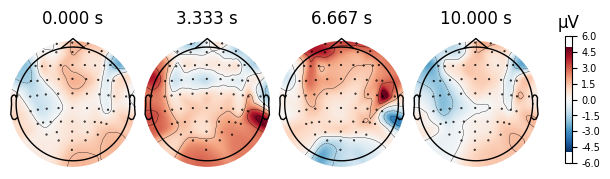

<Figure size 640x480 with 0 Axes>

In [12]:
# Let us explore some frequency bands
iter_freqs = [
('Theta', 4, 7),
('Alpha', 8, 13),
('Beta', 13, 15),
('Gamma', 30, 45)
]
band_obj=[]
plt.figure(figsize=(11.6,3))
for band, fmin, fmax in iter_freqs:
    # bandpass filter
    filtered = raw_obj.copy().filter(fmin, fmax,l_trans_bandwidth=1,h_trans_bandwidth=1)
    band_obj.append(filtered)
    # make sure filter params are the same
    plt.plot(filtered._data[10,0:1000])

plt.title("All Band Frequencies")
plt.show()


# NOTE This was custom and plots the topographic maps for all the different frequency bands

import mne
import numpy as np
import matplotlib.pyplot as plt

# List of frequency bands
iter_freqs = [
    ('Theta', 4, 7),
    ('Alpha', 8, 13),
    ('Beta', 13, 15),
    ('Gamma', 30, 45)
]


band_obj = []
# Loop through each frequency band
for i, (band, fmin, fmax) in enumerate(iter_freqs):
    # Bandpass filter the raw data for the specific frequency band
    # filtered = raw_obj.copy().filter(fmin, fmax, l_trans_bandwidth=1, h_trans_bandwidth=1)
    filtered = raw_obj.copy().filter(fmin, fmax)
    band_obj.append(filtered)
    
    # Now create epochs from the filtered raw data (you can adjust the tmin and tmax to define epoch duration)
    events = mne.make_fixed_length_events(filtered, duration=10.0)  # 2 seconds long epochs
    epochs = mne.Epochs(filtered, events, tmin=0, tmax=10.0, baseline=None)
    
    # Average the epochs to create an evoked object
    evoked = epochs.average()
    
    # Plot the topomap for the average data in this frequency band
    print(band)
    evoked.plot_topomap()

# Show the plot with all the frequency bands
plt.suptitle("Topomap for All Frequency Bands")
plt.tight_layout()
plt.show()


# Short Time Fourier Transform

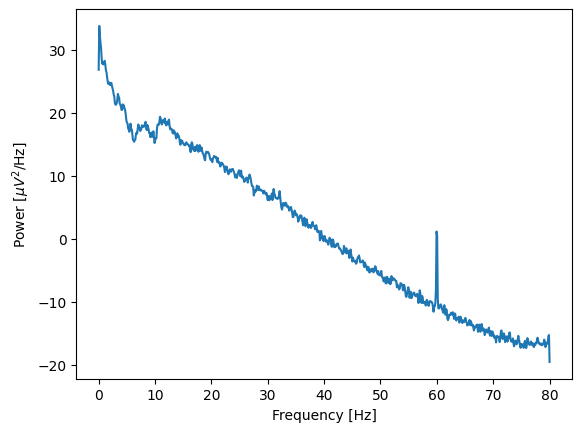

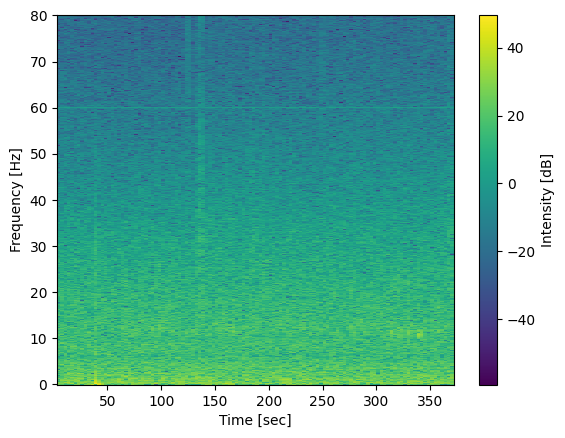

In [29]:
# We could use spectrogram to visualize time-frequency plot.
f, t, Sxx = sp.signal.spectrogram(raw_obj._data[60,:], fs=fs,
window=('hann'), nperseg=1500, noverlap=1000,scaling='density',
mode='psd')
# The scale of Sxx when we use scaling='density' is V**2/Hz
# To change the scale to muV**2/Hz(Db) which mne uses we use the
# following conversion
plt.plot(f, 10*np.log10(np.mean(Sxx*1e6**2 ,axis=1)))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [$\mu V^2$/Hz]')
plt.show()
plt.pcolormesh(t, f, 10*np.log10(Sxx*1e6**2), cmap='viridis')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar().set_label('Intensity [dB]')
plt.show()